Assignment: Flowers Recognition <br>
Dataset Description:<br>

This dataset contains 4242 images of flowers.<br>
The data collection is based on the data flicr, google images, yandex images.<br>
You can use this datastet to recognize plants from the photo.<br>

Attribute Information:<br>
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.<br>
For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. <br>
<b>Also explore how to resize images in tensorflow and then resize all the images to a same size. </b> <br>
This is a Multiclass Classification Problem.<br>




WORKFLOW : <br>
Load Data <br>
Split into 60 and 40 ratio.<br>
Encode labels.<br>
Create Model<br>
Compilation Step (Note : Its a Multiclass Classification problem , select loss , metrics according to it)<br>
Train the Model.<br>
If the model gets overfit tune your model by changing the units , No. of layers , epochs , add dropout layer or add Regularizer according to the need .<br>
Prediction should be > 85%<br>
Evaluation Step<br>
Prediction<br>




Data : <br>
https://drive.google.com/file/d/1-OX6wn5gA-bJpjPNfSyaYQLz-A-AB_uj/view?usp=sharing

In [187]:
import pathlib
dataset_url = "flowers"
data_dir = pathlib.Path(dataset_url)

In [188]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator()

dataset = data_generator.flow_from_directory(data_dir, class_mode='binary', batch_size=64)

Found 4323 images belonging to 5 classes.


In [189]:
batch_size = 32
img_height = 180
img_width = 180
x, y = dataset.next()

print('Batch shape={}, min={}, max={}'.format(x.shape, x.min(), x.max()))

Batch shape=(64, 256, 256, 3), min=0.0, max=255.0


In [190]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "flowers/",
  validation_split=0.4,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
  "flowers/",
  validation_split=0.4,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4323 files belonging to 5 classes.
Using 2594 files for training.
Found 4323 files belonging to 5 classes.
Using 1729 files for validation.


In [191]:
class_names = train_dataset.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


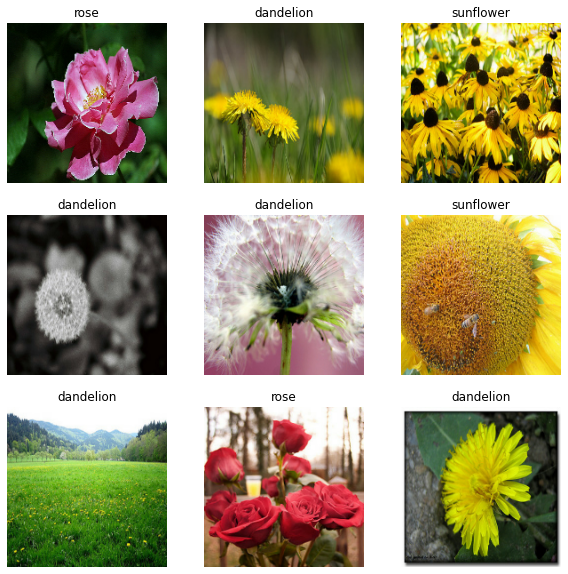

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [193]:
def process_and_standardize_images(image,img_height, img_width):
    img = image.map(lambda x, y: (tf.image.resize(x, size=(30, 30)), y))
    return img

In [ ]:
train_dataset = process_and_standardize_images(train_dataset, 3, 3)
test_dataset = process_and_standardize_images(test_dataset, 3, 3)

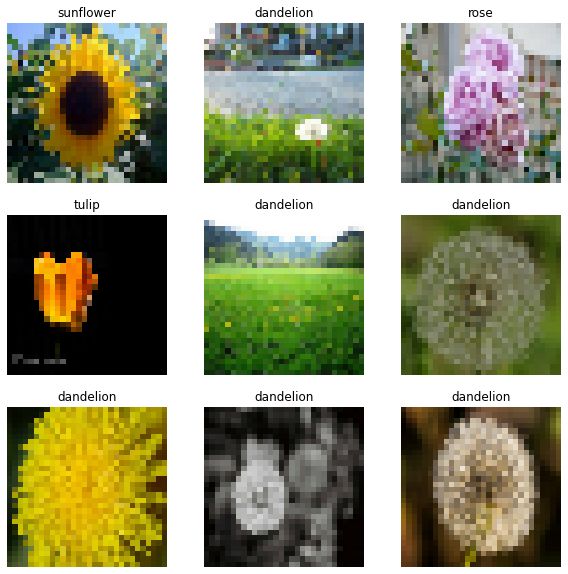

In [195]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [196]:
from tensorflow.keras import models, layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(30, 30, 3)),
    tf.keras.layers.Dense(60, activation="relu"),
    tf.keras.layers.Dense(30, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(loss='sparse_categorical_crossentropy', metrics=["accuracy"], optimizer="adam")

In [197]:
history = model.fit(train_dataset, validation_data=test_dataset, batch_size=128, epochs=20)

Epoch 1/20
82/82 [==============================] - 35s 276ms/step - loss: 60.0437 - accuracy: 0.1737 - val_loss: 2.2826 - val_accuracy: 0.1608
Epoch 2/20
82/82 [==============================] - 27s 328ms/step - loss: 2.2556 - accuracy: 0.1709 - val_loss: 2.2033 - val_accuracy: 0.2383
Epoch 3/20
82/82 [==============================] - 17s 205ms/step - loss: 2.1790 - accuracy: 0.2583 - val_loss: 2.1534 - val_accuracy: 0.2383
Epoch 4/20
82/82 [==============================] - 12s 146ms/step - loss: 2.1238 - accuracy: 0.2547 - val_loss: 2.1021 - val_accuracy: 0.2383
Epoch 5/20
82/82 [==============================] - 15s 176ms/step - loss: 2.0760 - accuracy: 0.2497 - val_loss: 2.0604 - val_accuracy: 0.2389
Epoch 6/20
82/82 [==============================] - 27s 316ms/step - loss: 2.0338 - accuracy: 0.2514 - val_loss: 2.0347 - val_accuracy: 0.2389
Epoch 7/20
82/82 [==============================] - 31s 355ms/step - loss: 1.9928 - accuracy: 0.2623 - val_loss: 2.0042 - val_accuracy: 0.241

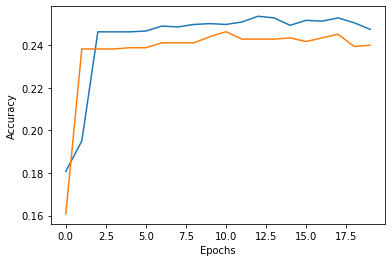

In [198]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(20), accuracy)
plt.plot(range(20), val_accuracy)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

In [216]:
import numpy as np
img = tf.keras.preprocessing.image.load_img(
    "/home/masoodhk/Documents/piaic-assignments/DLAssignments/592px-Red_sunflower.jpg", target_size=(img_height, img_width)
)

img = tf.image.resize(np.array(img), size=(30, 30))
print(img.shape)

predictions = model.predict(test_dataset.take(1))
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

(30, 30, 3)
This image most likely belongs to dandelion with a 11.11 percent confidence.
